# Artificial Neural Networks

## Introduction

<img src="https://media.springernature.com/original/springer-static/image/art%3A10.1007%2Fs40846-016-0191-3/MediaObjects/40846_2016_191_Fig1_HTML.gif">

<p style="text-align: justify;">Artificial Neural Networks are mathematical models inspired by the human brain, specifically the ability to learn, process, and perform tasks. Artificial Neural Networks are powerful tools that assist in solving complex problems linked mainly in the area of combinatorial optimization and machine learning. In this context, artificial neural networks have the most varied applications possible, as such models can adapt to the situations presented, ensuring a gradual increase in performance without any human interference. We can say that the Artificial Neural Networks are potent methods can give computers a new possibility, that is, a machine does not get stuck to pre-programmed rules and opens up various options to learn from its own mistakes.</p>

## Biologic Model

<img src="https://www.neuroskills.com/images/photo-500x500-neuron.png">
<p style="text-align: justify;">Artificial neurons are designed to mimic aspects of their biological counterparts. The neuron is one of the fundamental units that make up the entire brain structure of the central nervous system; such cells are responsible for transmitting information through the electrical potential difference in their membrane. In this context, a biological neuron can be divided as follows.</p>

**Dendrites** – are thin branches located in the nerve cell. These cells act on receiving nerve input from other parts of our body.

**Soma** – acts as a summation function. As positive and negative signals (exciting and inhibiting,respectively) arrive in the soma from the dendrites they are added together.

**Axon** – gets its signal from the summation behavior which occurs inside the soma. It is formed by a single extended filament located throughout the neuron. The axon is responsible for sending nerve impulses to the external environment of a cell.

## Artificial Neuron as Mathematic Notation
In general terms, an input X is multiplied by a weight W and added a bias b producing the net activation.
<img style="max-width:60%;max-height:60%;" src="https://miro.medium.com/max/1290/1*-JtN9TWuoZMz7z9QKbT85A.png">

We can summarize an artificial neuron with the following mathematical expression:
$$
\hat{y} = f\left(\text{net}\right)= f\left(\vec{w}\cdot\vec{x}+b\right) = f\left(\sum_{i=1}^{n}{w_i x_i + b}\right)
$$

## The SingleLayer Perceptron

<p style="text-align: justify;">The Perceptron and its learning algorithm pioneered the research in neurocomputing. the perceptron is an algorithm for supervised learning of binary classifiers [1]. A binary classifier is a function which can decide whether or not an input, represented by a vector of numbers, belongs to some specific class. It is a type of linear classifier, i.e. a classification algorithm that makes its predictions based on a linear predictor function combining a set of weights with the feature vector.<p>
    
<img src="https://www.edureka.co/blog/wp-content/uploads/2017/12/Perceptron-Learning-Algorithm_03.gif">
    
#### References
    
- Freund, Y.; Schapire, R. E. (1999). "Large margin classification using the perceptron algorithm" (PDF). Machine Learning

- Aizerman, M. A.; Braverman, E. M.; Rozonoer, L. I. (1964). "Theoretical foundations of the potential function method in pattern recognition learning". Automation and Remote Control. 25: 821–837.

- Mohri, Mehryar and Rostamizadeh, Afshin (2013). Perceptron Mistake Bounds.

## The SingleLayer Perceptron Learning
Learning goes by calculating the prediction of the perceptron:

### Basic Neuron
$$
\hat{y} = f\left(\vec{w}\cdot\vec{x} + b) = f( w_{1}x_{1} + w_2x_{2} + \cdots + w_nx_{n}+b\right)\,
$$

After that, we update the weights and the bias using as:

$$
\hat{w_i} = w_i + \alpha (y - \hat{y}) x_{i} \,,\  i=1,\ldots,n\,;\\
$$
$$
\hat{b} = b + \alpha (y - \hat{y})\,.
$$

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

class SingleLayerPerceptron:
    def __init__(self, my_weights, my_bias, learningRate=0.05):
        self.weights = my_weights
        self.bias = my_bias
        self.learningRate = learningRate

    def activation(self, net):
        answer = 1 if net > 0 else 0
        return answer

    def neuron(self, inputs):
        neuronArchitecture = np.dot(self.weights, inputs) + self.bias
        return neuronArchitecture

    def neuron_propagate(self, inputs):
        processing = self.neuron(inputs)
        return self.activation(processing)

    def training(self, inputs, output):
        output_prev = self.neuron_propagate(inputs)
        self.weights = [W + X * self.learningRate * (output - output_prev)
                       for (W, X) in zip(self.weights, inputs)]
        self.bias += self.learningRate * (output - output_prev)
        error_calculation = np.abs(output_prev - output)
        return error_calculation

In [ ]:
data = pd.DataFrame(columns=('x1', 'x2'), data=np.random.uniform(size=(600,2)))
data.head()

,x1,x2
0,0.341993,0.449580
1,0.937391,0.984992
2,0.985686,0.092245
3,0.700995,0.380704
4,0.430844,0.574478


In [ ]:
def show_dataset(data, ax):
    data[data.y==1].plot(kind='scatter', ax=ax, x='x1', y='x2', color='blue')
    data[data.y==0].plot(kind='scatter', ax=ax, x='x1', y='x2', color='red')
    plt.grid()
    plt.title(' My Dataset')
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

def testing(inputs):
    answer = int(np.sum(inputs) > 1)
    return answer

data['y'] = data.apply(testing, axis=1)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


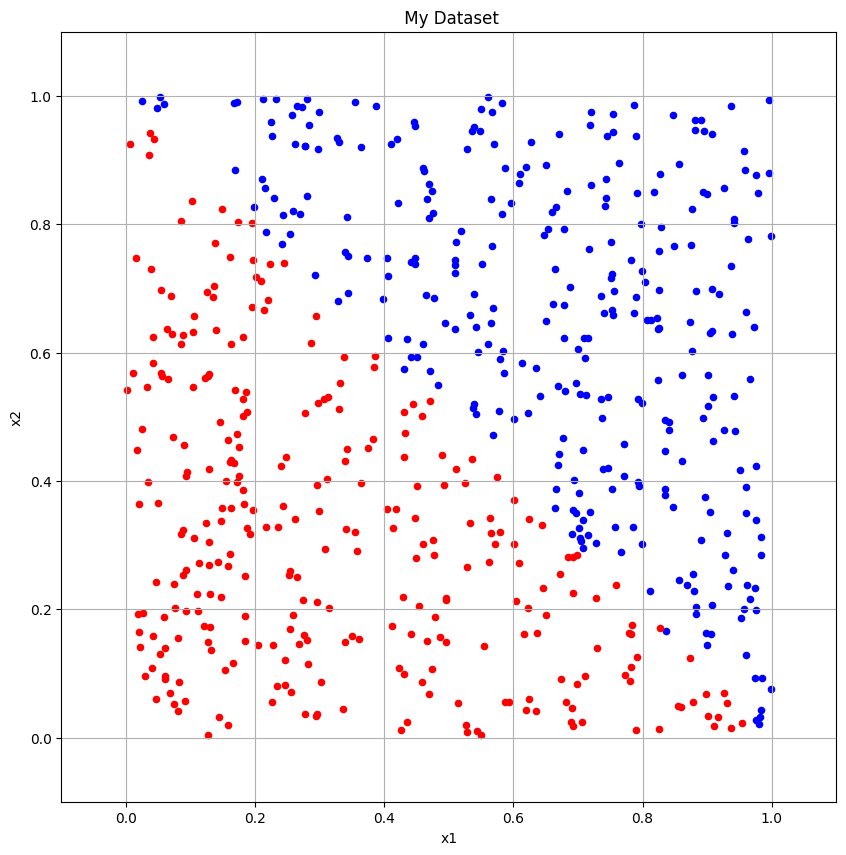

In [ ]:
fig = plt.figure(figsize=(10,10))
show_dataset(data, fig.gca())

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.1
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

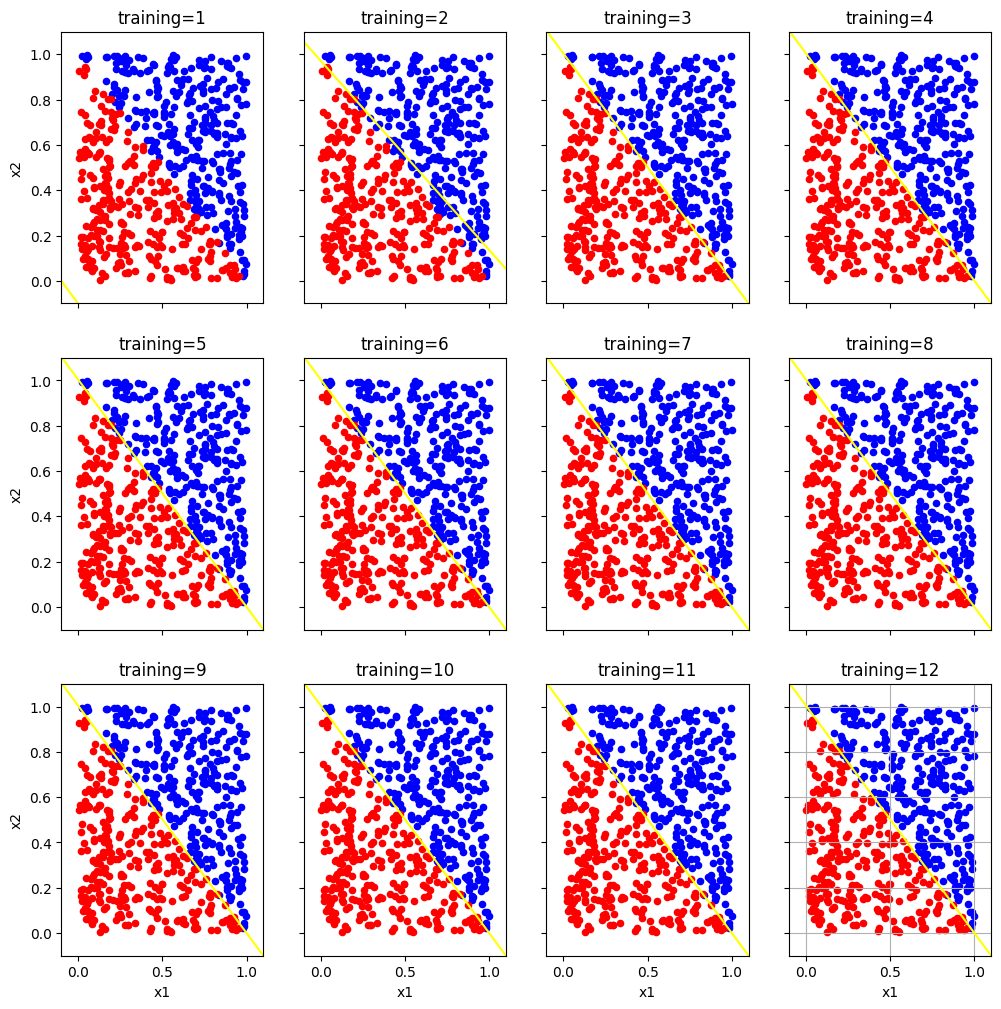

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

# Assignment

###**Task 1:** Changing LearningRate Values

Exercise 1:
<br/>Part A (2 Points): Change the values for LearningRate: LearningRate=0.01
<br/>Part B (1 Point):  Summarize your observations based on the new LearningRate value

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.01
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

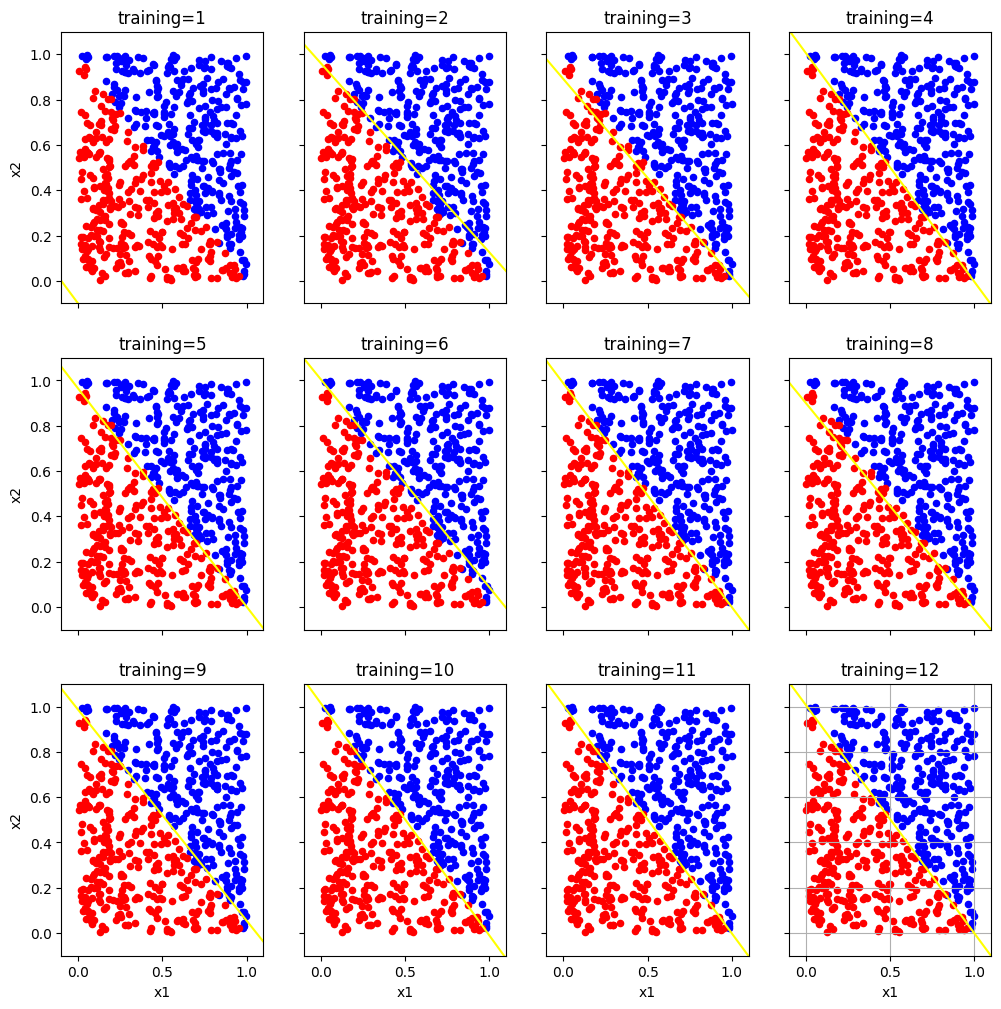

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 1 Answers Here

#Slowing down the learning rate made it so the model could not come to a satisfactory solution. We see that the line does not fit the data properly, it is not given an aggressive enough learning rate. The best performance for this given data occurs when the learning rate is set to 0.1.

Exercise 2:
<br/>Part A (2 Points): Change the values for LearningRate: LearningRate=0.10
<br/>Part B (1 Point):  Summarize your observations based on the new LearningRate value

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.10
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

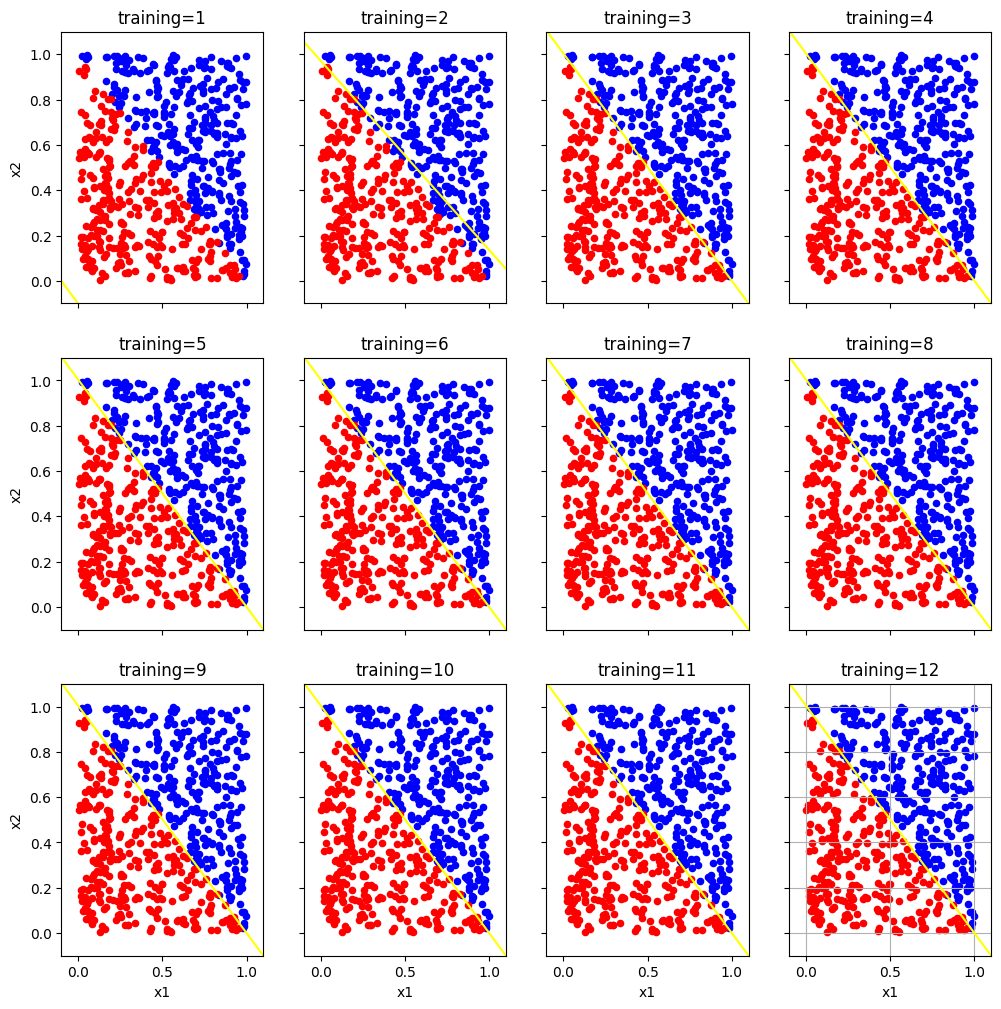

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 2 Answers Here

#The line of fit is more accurate than the previous tested learning rate. A more aggressive learning rate for this data allows for the neural network to learn the underlying patterns.

Exercise 3:
<br/>Part A (2 Points): Change the values for LearningRate: LearningRate=0.15
<br/>Part B (1 Point):  Summarize your observations based on the new LearningRate value


In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.15
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

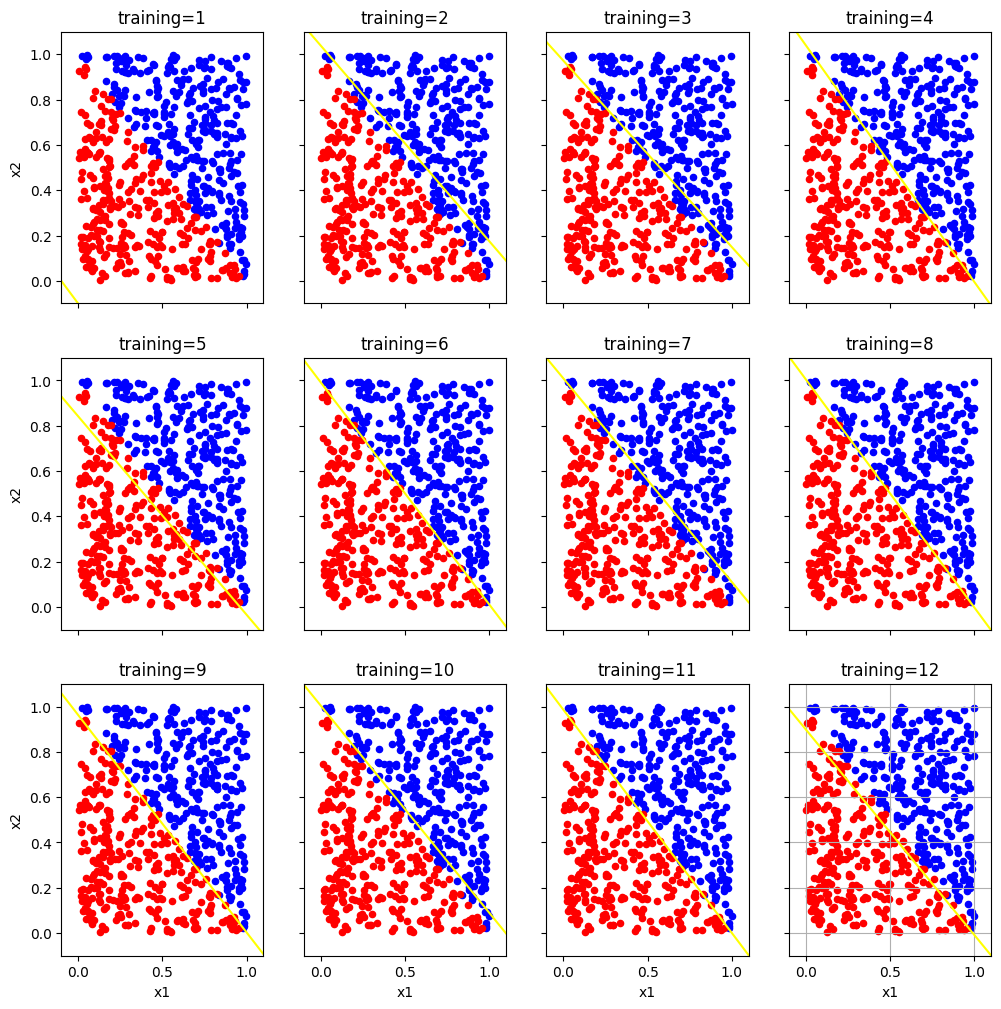

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 3 Answers Here

#I stand corrected the optimal learning rate is 0.15. We can see that increasing the learning rate helped the model produce faster convergence and better accuracy.

Exercise 4:
<br/>Part A (2 Points): Change the values for LearningRate: LearningRate=0.20
<br/>Part B (1 Point):  Summarize your observations based on the new LearningRate value


In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.20
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

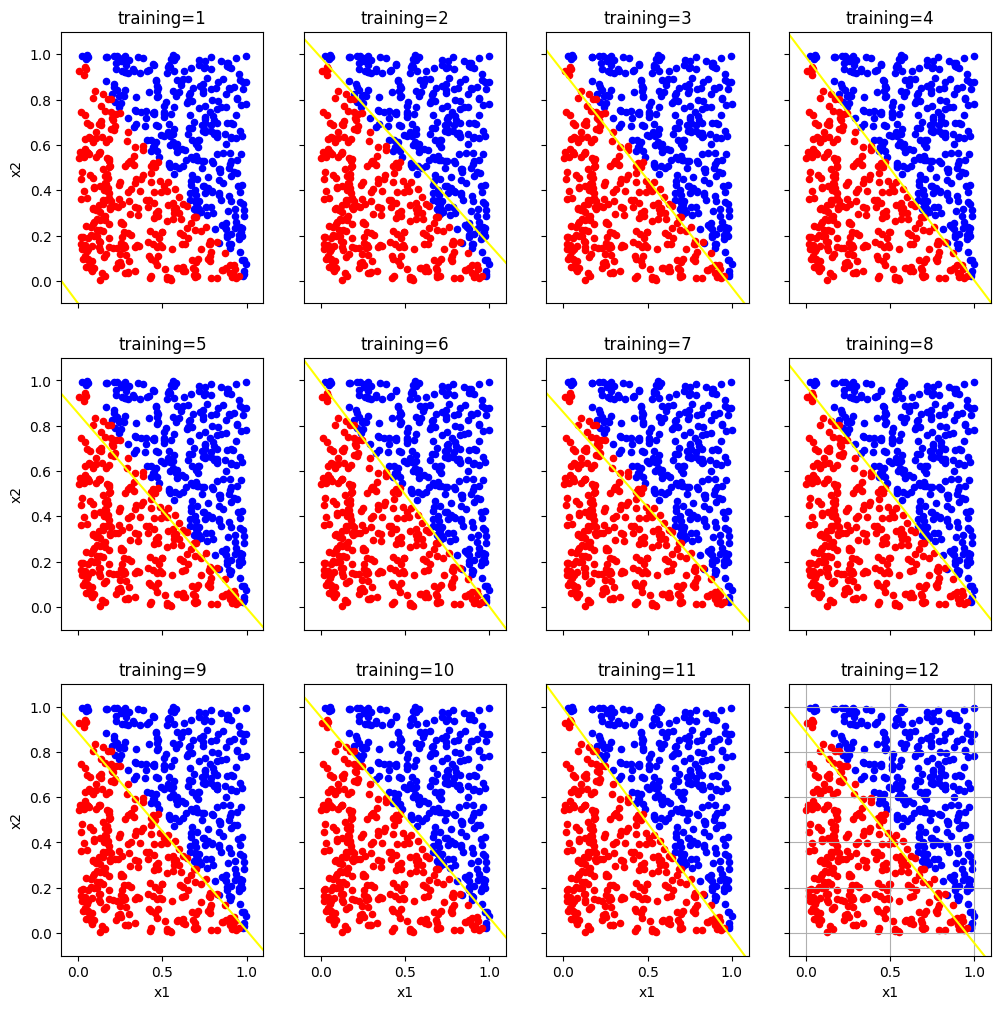

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 4 Answers Here

#Here we can see that increasing the learning rate to 0.20 has caused the model to overshoot the given data. The training doesn't it seem to be linear and fails after some iterations and does not correct itself. Training=12 does not hold an accurate fit of the data.

Exercise 5:
<br/>2 Points: Conclude the best LearningRate value.

In [ ]:
# Exercise 5 Answers Here

#I believe that 0.15 is the most optimal learning rate, this number allows us to achieve the best and most accurate results for the given data.

###**Task 2:** Changing InitialBias Values

Exercise 1:
<br/>Part A (2 Points): Change the values for InitialBias: InitialBias=0.01
<br/>Part B (1 Point): Summarize your observations based on the new InitialBias value

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.1
InitialBias = 0.01
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

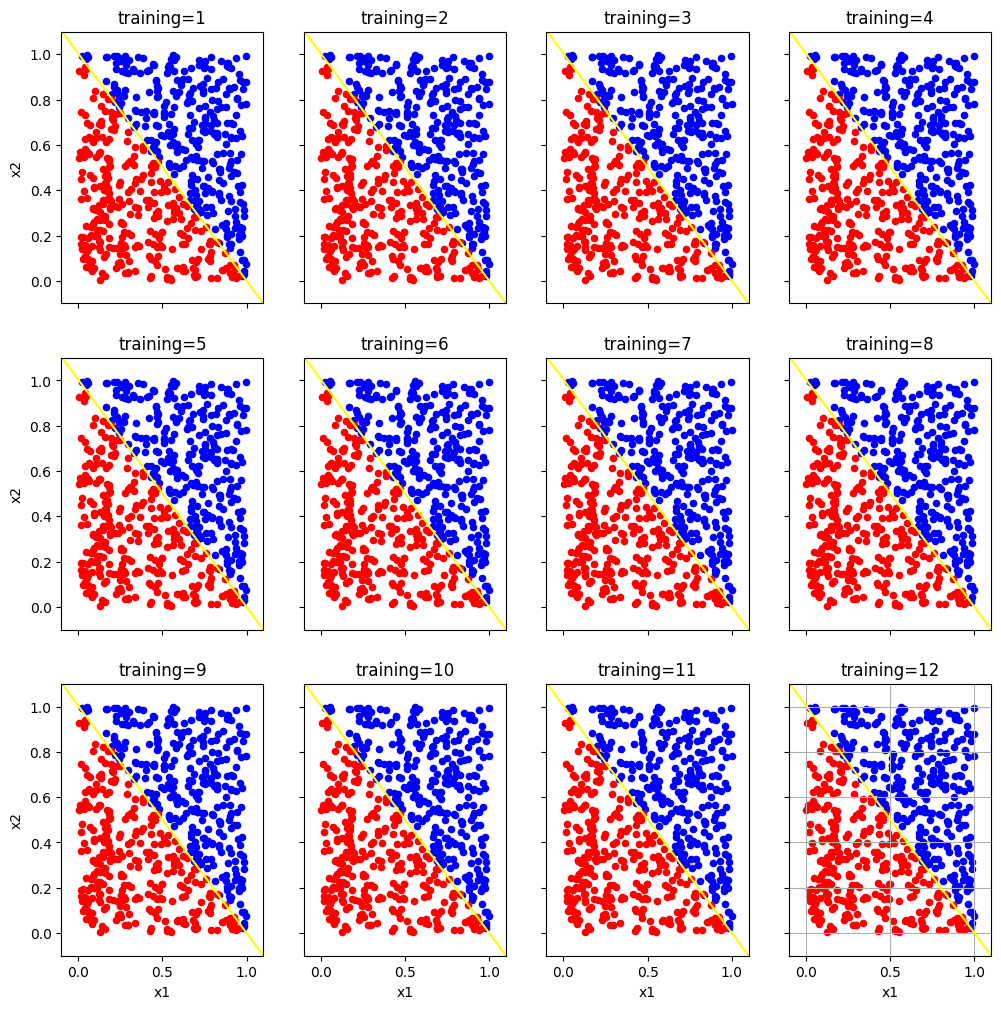

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 1 Answers Here

#When changing the initial bias to a lower value. We can see that it takes less training iterations for the data to be trained on. The data is almost full trained within 3-4 iterations. This leads to faster convergence than the previous initial bias.

Exercise 2:
<br/>Part A (2 Points): Change the values for InitialBias: InitialBias=0.10
<br/>Part B (1 Point): Summarize your observations based on the new InitialBias value

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.1
InitialBias = 0.10
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


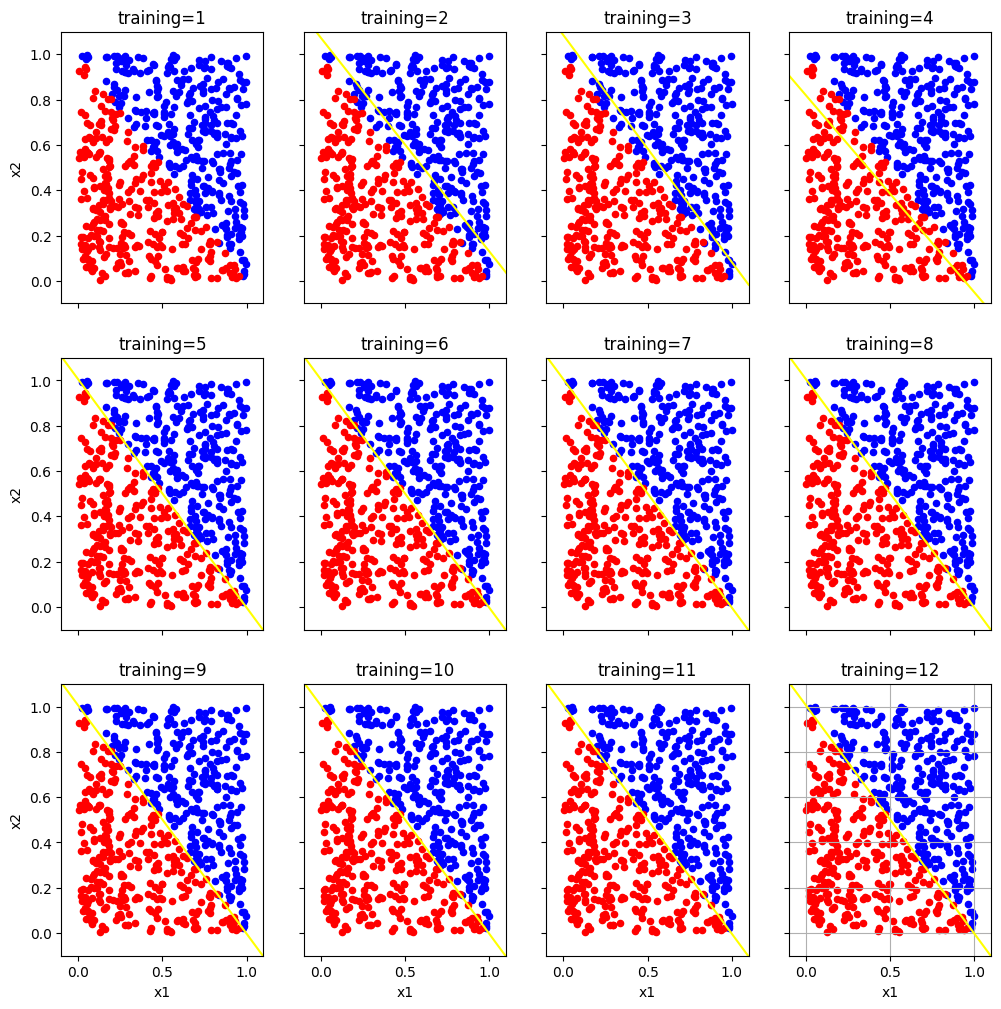

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 2 Answers Here

#We can see that increasing the initial bias continues to prolong the required training iterations. Although, we still land at the desired solution at the end

Exercise 3:
<br/>Part A (2 Points): Change the values for InitialBias: InitialBias=1.0
<br/>Part B (1 Point): Summarize your observations based on the new InitialBias value

In [ ]:
InitialWeights = [0.1, 0.1]
#Observe Graphs with different values of InitialBias and LearningRate(Change one parameter at a time)

LearningRate = 0.1
InitialBias = 1.0
SLperceptron = SingleLayerPerceptron(InitialWeights,
                                     InitialBias,
                                     LearningRate)

/usr/local/lib/python3.9/dist-packages/pandas/plotting/_matplotlib/core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


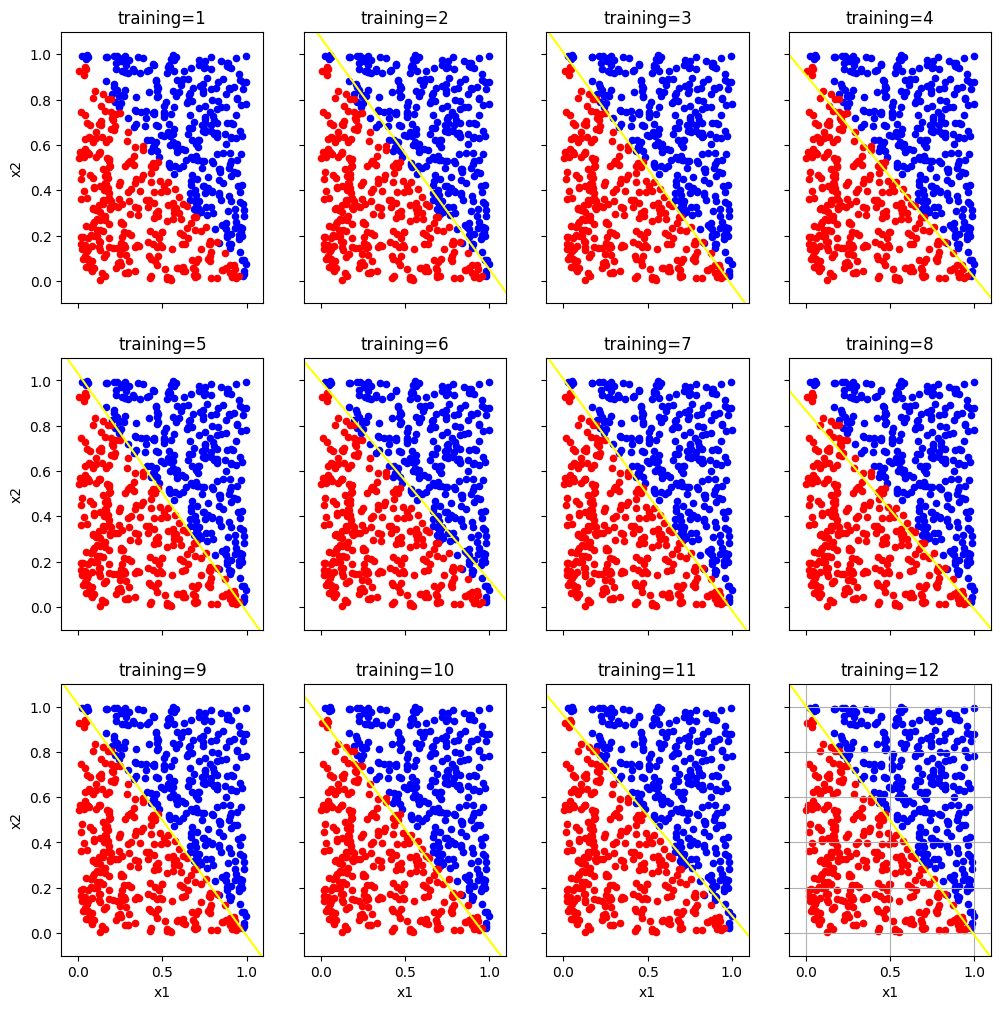

In [ ]:
import random, itertools

def showAll(perceptron, data, threshold, ax=None):
    if ax==None:
        fig = plt.figure(figsize=(5,4))
        ax = fig.gca()

    show_dataset(data, ax)
    show_threshold(perceptron, ax)
    title = 'training={}'.format(threshold + 1)
    ax.set_title(title)

def trainingData(SinglePerceptron, inputs):
    count = 0
    for i, line in inputs.iterrows():
        count = count + SinglePerceptron.training(line[0:2],
                                                  line[2])

    return count

def limit(neuron, inputs):
    weights_0 = neuron.weights[0]
    weights_1 = neuron.weights[1]
    bias = neuron.bias
    threshold = -weights_0 * inputs - bias
    threshold = threshold / weights_1
    return threshold

def show_threshold(SinglePerceptron, ax):
    xlim = plt.gca().get_xlim()
    ylim = plt.gca().get_ylim()

    x2 = [limit(SinglePerceptron, x1) for x1 in xlim]

    ax.plot(xlim, x2, color="yellow")
    ax.set_xlim(-0.1,1.1)
    ax.set_ylim(-0.1,1.1)

f, axarr = plt.subplots(3, 4, sharex=True, sharey=True, figsize=(12,12))
axs = list(itertools.chain.from_iterable(axarr))
until = 12
for interaction in range(until):
    showAll(SLperceptron, data, interaction, ax=axs[interaction])
    trainingData(SLperceptron, data)

In [ ]:
# Exercise 3 Answers Here

#We can see that the data has trouble in the beggining during training. It is worse than the previous initialbias value.

Exercise 4:
<br/>2 Points: Conclude the best InitialBias value.

In [ ]:
# Exercise 4 Answers Here

#I believe that when changing the values for InitialBias: InitialBias=0.01, we have seen the most efficient use of trained data per iteration. I believe this avoids biasing the perceptron towards on class or the other.